#### Title: Exercises
#### Author: Jerock Kalala
#### Date: Mai 7th 2023
#### Modified By: --
#### Classification Modeling

In [128]:
#Import libraries
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


Components of EDA
To me, there are main components of exploring data:

Understanding your variables
Cleaning your dataset
Analyzing relationships between variables

In [129]:
#Loading the data
data = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_7\\eda_classification.csv")
print(data.shape)
data.head()

(9999, 19)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1


Note: Our dataset has 19 columns and 9999 rows

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9996 non-null   float64
 1   x1      9999 non-null   object 
 2   x2      9995 non-null   float64
 3   x3      9996 non-null   float64
 4   x4      9997 non-null   float64
 5   x5      9997 non-null   float64
 6   x6      9999 non-null   float64
 7   x7      9996 non-null   object 
 8   x8      9998 non-null   float64
 9   x9      9999 non-null   float64
 10  x10     9996 non-null   float64
 11  x11     9997 non-null   object 
 12  x12     9995 non-null   float64
 13  x13     9998 non-null   object 
 14  x14     9997 non-null   object 
 15  x15     9999 non-null   float64
 16  x16     9998 non-null   float64
 17  x17     9999 non-null   object 
 18  y       9999 non-null   int64  
dtypes: float64(12), int64(1), object(6)
memory usage: 1.4+ MB


Note: Some features have of object type. During the cleaning process we may decide to change the data type, or keep it as is,

-Check for duplication

In [131]:
data.nunique()

x0     9996
x1       12
x2     9995
x3     9996
x4     9997
x5     9997
x6     9999
x7     9849
x8     9998
x9     9999
x10    9996
x11       9
x12    9995
x13      10
x14       8
x15    9999
x16    9998
x17       3
y         2
dtype: int64

Missing values Calculation

In [132]:
data.isnull().sum()

x0     3
x1     0
x2     4
x3     3
x4     2
x5     2
x6     0
x7     3
x8     1
x9     0
x10    3
x11    2
x12    4
x13    1
x14    2
x15    0
x16    1
x17    0
y      0
dtype: int64

The below code helps to calculate the percentage of missing values in each column

In [133]:
(data.isnull().sum()/(len(data)))*100

x0     0.030003
x1     0.000000
x2     0.040004
x3     0.030003
x4     0.020002
x5     0.020002
x6     0.000000
x7     0.030003
x8     0.010001
x9     0.000000
x10    0.030003
x11    0.020002
x12    0.040004
x13    0.010001
x14    0.020002
x15    0.000000
x16    0.010001
x17    0.000000
y      0.000000
dtype: float64

#### Multivariate EDA

In [134]:
data.describe()

,x0,x2,x3,x4,x5,x6,x8,x9,x10,x12,x15,x16,y
count,9996.000000,9995.000000,9996.000000,9997.000000,9997.000000,9999.000000,9998.000000,9999.000000,9996.000000,9995.000000,9999.000000,9998.000000,9999.000000
mean,6.501091,-3.729880,-7.335819,-0.001323,1.347141,1.214413,-4.239862,-0.297257,-22.482050,0.034517,-0.222981,-0.430020,0.491949
std,29.140034,17.237178,38.355015,3.995307,9.606695,17.352962,131.921984,37.987287,91.723733,6.065264,14.679529,2.825224,0.499960
min,-106.809919,-65.137848,-150.846091,-14.616540,-37.499530,-59.900503,-661.764937,-142.719688,-427.412374,-25.024464,-57.315771,-12.527505,0.000000
25%,-13.094564,-15.356197,-33.079854,-2.681308,-5.047927,-10.904697,-91.489340,-25.685742,-79.734745,-4.191568,-10.312554,-2.346461,0.000000
50%,6.659263,-3.825630,-7.374468,0.010637,1.217076,0.814006,-4.744892,-0.239779,-20.459860,0.154775,-0.633445,-0.415075,0.000000
75%,26.214107,7.764036,18.477979,2.635699,7.807128,12.693538,83.831778,25.459537,38.383398,4.136013,9.504719,1.448256,1.000000
max,114.823451,67.685933,127.204103,16.923269,38.624213,68.865261,476.910533,181.063340,319.592518,21.540626,57.918619,8.987513,1.000000


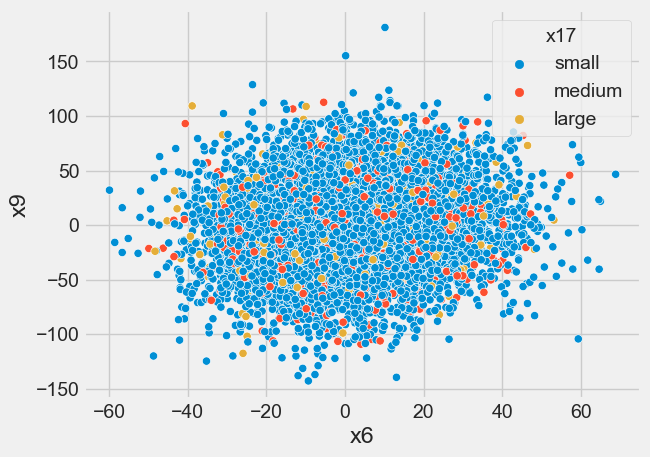

In [100]:
sns.scatterplot(x='x6', y='x9', hue='x17', data=data);

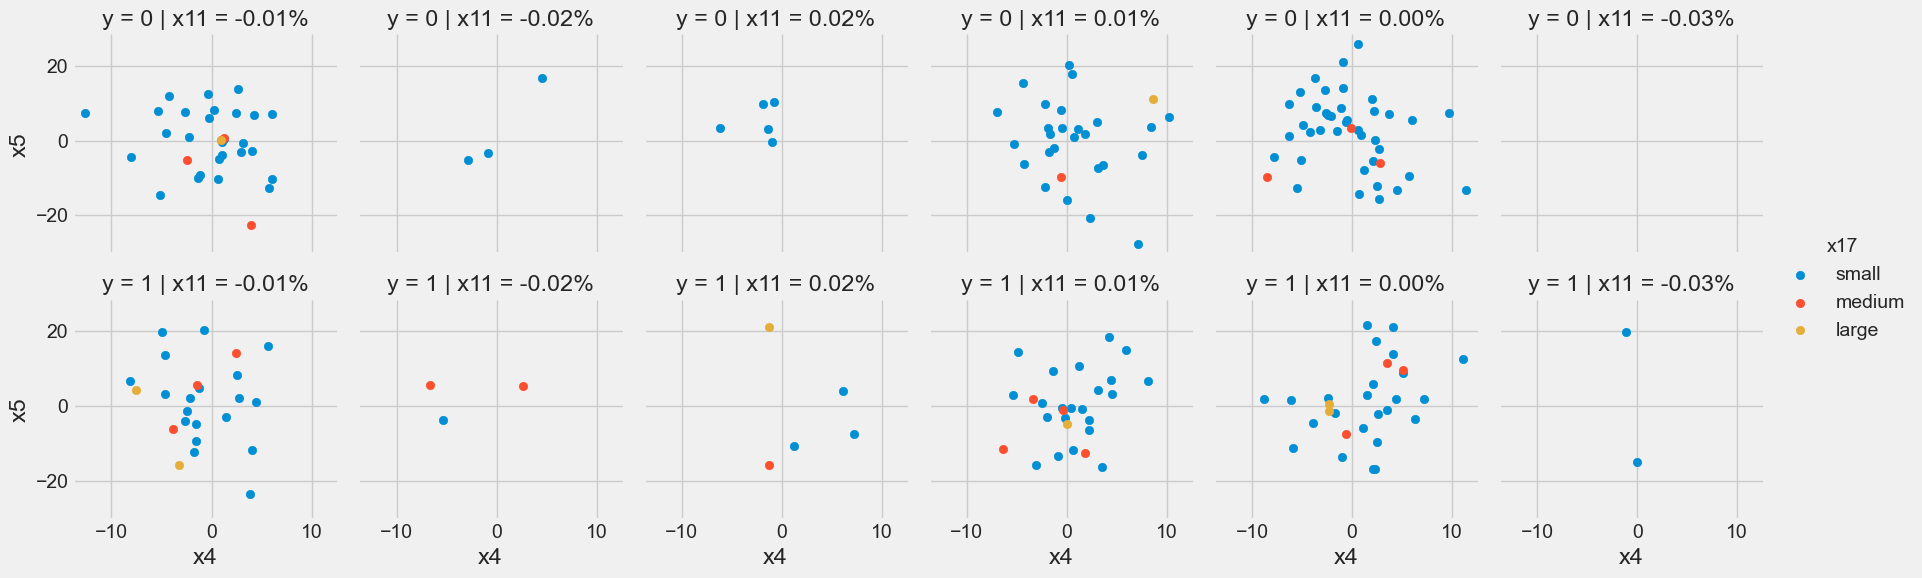

In [101]:
# create the FacetGrid instance
sample_eda= data.sample(n=200)
p = sns.FacetGrid(sample_eda, col="x11", row='y', hue='x17')
# choose the graph to display in each subplot
p.map(plt.scatter, 'x4', 'x5')
p.add_legend();

In [102]:
data.corr()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_24720\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,x0,x2,x3,x4,x5,x6,x8,x9,x10,x12,x15,x16,y
x0,1.000000,-0.219569,-0.147841,0.001725,-0.190191,-0.037337,-0.362803,0.087414,-0.116586,-0.001615,-0.125526,-0.058138,-0.004454
x2,-0.219569,1.000000,-0.024894,0.002963,-0.115697,0.144764,-0.216378,0.078245,0.070796,0.002412,0.144808,0.100962,-0.000975
x3,-0.147841,-0.024894,1.000000,0.016473,-0.152140,0.121463,0.130809,0.026149,0.076399,0.002097,-0.183583,0.079056,0.004600
x4,0.001725,0.002963,0.016473,1.000000,-0.005837,-0.000729,-0.016484,-0.022474,0.002219,0.009156,0.004372,0.004896,-0.003939
x5,-0.190191,-0.115697,-0.152140,-0.005837,1.000000,-0.038982,0.059076,-0.094444,-0.097260,0.001803,0.121232,-0.030424,-0.004438
x6,-0.037337,0.144764,0.121463,-0.000729,-0.038982,1.000000,-0.089647,0.109608,-0.186171,0.004956,-0.018823,0.127856,0.002482
x8,-0.362803,-0.216378,0.130809,-0.016484,0.059076,-0.089647,1.000000,0.062623,0.086901,-0.011249,0.000520,0.148375,-0.014472
x9,0.087414,0.078245,0.026149,-0.022474,-0.094444,0.109608,0.062623,1.000000,-0.014459,-0.006496,-0.144371,0.037877,0.000476
x10,-0.116586,0.070796,0.076399,0.002219,-0.097260,-0.186171,0.086901,-0.014459,1.000000,0.006954,0.054775,-0.323785,0.015393
x12,-0.001615,0.002412,0.002097,0.009156,0.001803,0.004956,-0.011249,-0.006496,0.006954,1.000000,0.015121,-0.007004,-0.000763


C:\Users\jeroc\AppData\Local\Temp\ipykernel_24720\830557274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

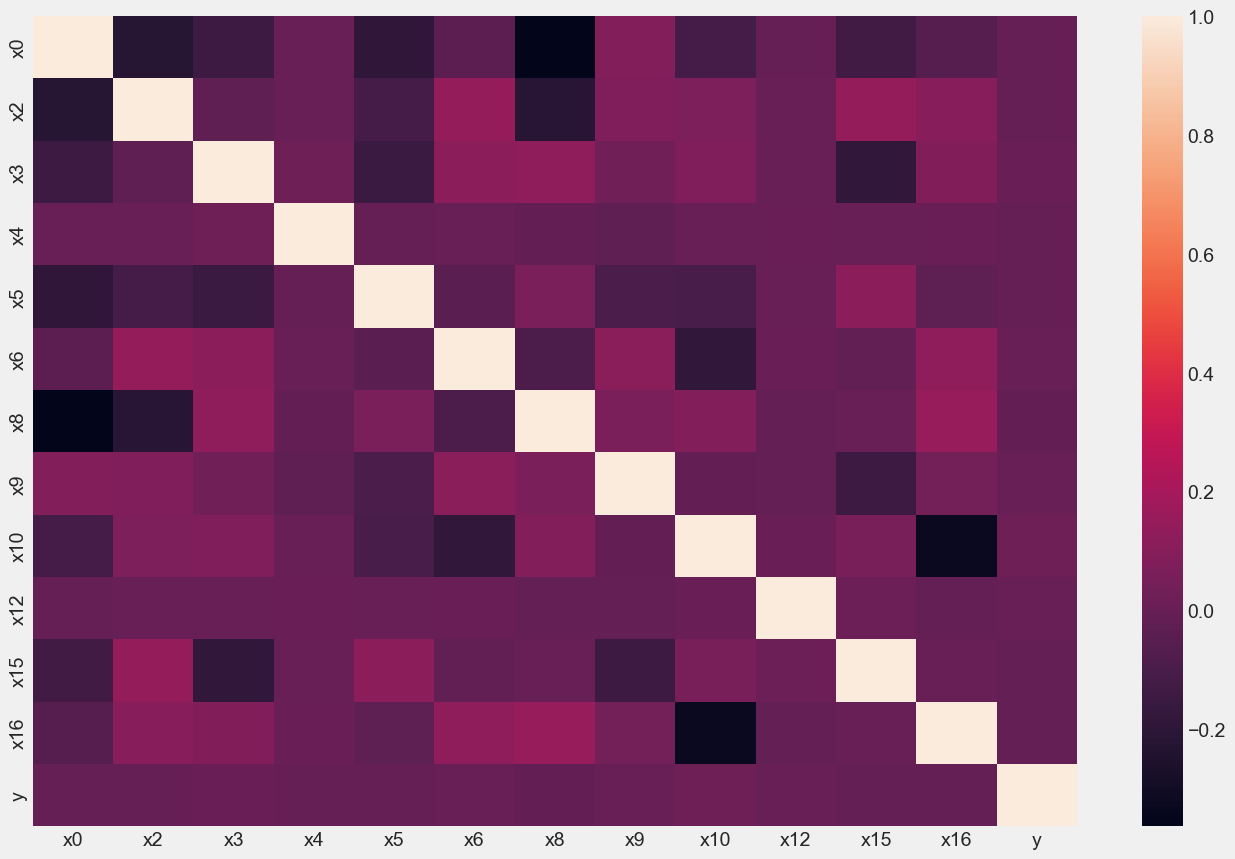

In [103]:
#Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

Encoding categorical features

In [135]:
data['x17'].value_counts(sort=False)

small     8849
medium     783
large      367
Name: x17, dtype: int64

In [136]:
#use a simple map function
map_x17 = {"small" : 1, "medium": 2, "large": 3}
data['x17'] = data['x17'].map(map_x17)
data['x17'] = (data['x17']).astype('int')
data['x17'].value_counts()

1    8849
2     783
3     367
Name: x17, dtype: int64

In [137]:
data['x14'].value_counts(sort=False)

thurday      3336
thur         1097
wednesday    1489
wed          3709
tuesday       214
monday         15
friday        130
fri             7
Name: x14, dtype: int64

In [138]:
data['x14'].fillna(value = 0,inplace = True)
data['x14'].head()

0      thurday
1         thur
2    wednesday
3          wed
4    wednesday
Name: x14, dtype: object

In [139]:
#use a simple map function
map_x14 = {"monday": 2,"tuesday" : 3, "wednesday": 4, "wed": 4,"thurday" : 5, "thur" : 5, "friday": 6, "fri": 6}
data['x14'] = data['x14'].map(map_x14)
data['x14'].fillna(value = 0,inplace = True)
data['x14'] = (data['x14']).astype('int')

C:\Users\jeroc\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='x10', ylabel='y'>

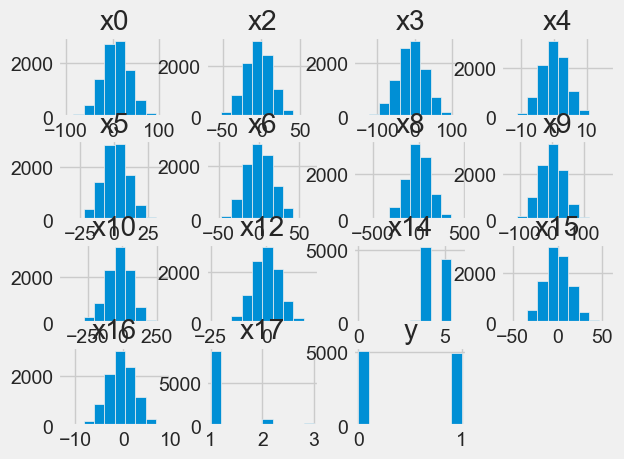

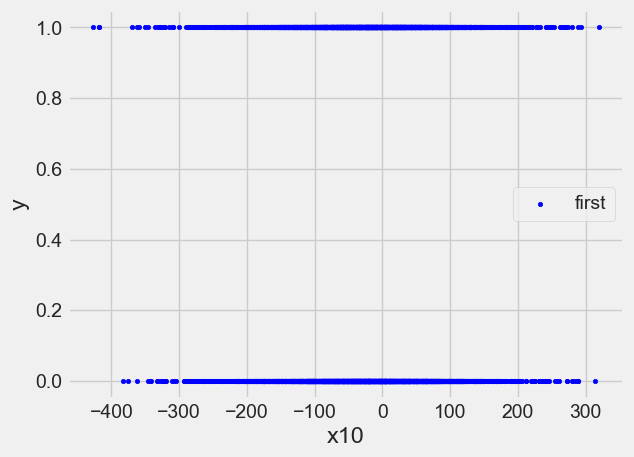

In [177]:
# visualize data
data.hist()
data.plot.scatter(x='x10', y='y', s=10, c='b', marker="o", label='first')

## Modeling

- Pratical considerations before modeling

In [140]:
#Replace any missing value with 0
data.fillna(value = 0,inplace = True)
data.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
y      0
dtype: int64

Chaning the target variable dtype

In [141]:
data['y'] = (data['y']).astype('int')

In [142]:
df = data.drop(['x1', 'x11', 'x13', 'x7'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9999 non-null   float64
 1   x2      9999 non-null   float64
 2   x3      9999 non-null   float64
 3   x4      9999 non-null   float64
 4   x5      9999 non-null   float64
 5   x6      9999 non-null   float64
 6   x8      9999 non-null   float64
 7   x9      9999 non-null   float64
 8   x10     9999 non-null   float64
 9   x12     9999 non-null   float64
 10  x14     9999 non-null   int32  
 11  x15     9999 non-null   float64
 12  x16     9999 non-null   float64
 13  x17     9999 non-null   int32  
 14  y       9999 non-null   int32  
dtypes: float64(12), int32(3)
memory usage: 1.0 MB


Splitting and standarizing the dataset

In [143]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
print("x_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

x_train shape:  (7999, 14)
Y_train shape:  (7999,)
x_test shape:  (2000, 14)
Y_test shape:  (2001,)


In [160]:
from sklearn.preprocessing import StandardScaler

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### - Implement the classification Model
We will try with 2 different algorithms: Logistic regression, and random forest.

In [162]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

1. Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state = 42)

reg.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [179]:
y_pred_LR = reg.predict(X_test)
y_pred_LR[:5]

array([0, 1, 0, 0, 0])

Performance metrics

#Cross validation

In [172]:


from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.50506308630394


ValueError: Found input variables with inconsistent numbers of samples: [2001, 2000]

2. RandomForest

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25,
                            max_features=6,
                            max_depth=4,
                            random_state=61)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=25,
                       random_state=61)

In [148]:
y_pred_rf = rf.predict(X_train)
y_pred_rf[:5]

array([1, 0, 0, 0, 1])

In [171]:
#Test the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_true=y_train, y_pred=y_pred_rf)
print("The accuracy score is: ", accuracy_rf)

The accuracy score is:  0.5903237904738092


Note: We got a good accuracy score with Random Forest algorithm.